In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

데이터준비
다중분류 7가지 생선중에 뭘까

In [34]:
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [35]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [36]:
#diagonal - 대각선

pd.unique(fish['Species']) # or fish.Species

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [37]:
# 훈련시킬 입력 데이터를 만들기 (5가지 특성을 가지고.
# )

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [38]:
fish_input[:5] #5개만

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [39]:
# 어종에 대해 예측한 결과값
fish_target = fish['Species'].to_numpy()
fish_target[154:]

# 'Weight','Length','Diagonal','Height','Width' - x0 x1 x2 x3 x4

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [40]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)



In [41]:
print(train_input.shape, test_input.shape)

(119, 5) (40, 5)


#### 단위값을 표준화

In [42]:
# weight 8 ~ 1000, width 5 ~ 10 단위 간 차이가 많이 나므로 표준화 필요 -2 ~ 2 ?
# actual - mean / stdev
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) # x0 ~ x4 평균 표편 미리 구함

StandardScaler()

In [43]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [44]:
train_scaled[:20]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ],
       [-0.9127463 , -0.96490079, -0.95281644, -0.88017186, -0.99153566],
       [-0.79734143, -0.70251203, -0.76172762, -0.78282455, -0.54453018],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [-0.74104638, -0.67439895, -0.73567006, -0.61205928, -0.55733138],
       [-0.86771025, -0.7962223 , -0.89201546, -0.93358694, -1.02183182],
       [ 0.82114147,  0.74999715,  0.67143852,  0.4984706 ,  1.47257213],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.33981873,  0.40326915,  0.23714575,  0.28831696,  0.95686692],
       [-0.54401367, -0.51509149, -0.4

k-최근접 이웃 알고리즘 분류

In [45]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)


KNeighborsClassifier(n_neighbors=3)

In [46]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [47]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [48]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [49]:
test_input[:5]

array([[ 78.    ,  18.7   ,  19.4   ,   5.1992,   3.1234],
       [ 13.4   ,  12.4   ,  13.5   ,   2.43  ,   1.269 ],
       [200.    ,  32.3   ,  34.8   ,   5.568 ,   3.3756],
       [270.    ,  26.    ,  28.7   ,   8.3804,   4.2476],
       [150.    ,  23.    ,  24.5   ,   5.2185,   3.626 ]])

In [50]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [51]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [52]:
from unicodedata import decimal

print(kn.classes_)
proba = kn.predict_proba(test_scaled[:5]) # 예측 결과 값을 한눈에 파악 할 수 있는 함수
print(np.round(proba, decimals=4)) # decimal = 소수점 몇자리까지 표기한다는 뜻

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


### 로지스틱 회귀

In [53]:
z = np.arange(-5, 5, 0.1)

Text(0.5, 0, 'z')

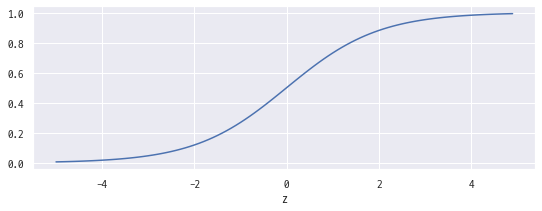

In [54]:
phi = 1 / (1+np.exp(-z))
plt.figure(figsize=(9,3))
plt.plot(z,phi)
plt.xlabel('z')

로지스틱 이진분류

이거 하려면 둘 만 있어야 하니까.

In [55]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

In [56]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [57]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt.shape, target_bream_smelt.shape)

(33, 5) (33,)


In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [59]:
lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [60]:
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [61]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [62]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [63]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [64]:
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [65]:
### 이항 로지스틱 회귀

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 회귀 로지스틱 클래스
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [67]:
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [68]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [69]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [70]:
# 159개 있는 테스트 데이터 중 40개 인덱스로 뽑음
bream_smelt_indexes_2 = (test_target == 'Bream') | (test_target == 'Smelt')
bream_smelt_indexes_2

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False])

In [72]:
test_bream_smelt = test_scaled[bream_smelt_indexes_2]

In [74]:
ttarget_bream_smelt = test_target[bream_smelt_indexes_2]

In [75]:
# test data 로 정확도 추출

lr.score(test_bream_smelt, ttarget_bream_smelt)

1.0

In [79]:
lr.predict(test_bream_smelt)

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream'], dtype=object)

In [78]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [80]:
proba = lr.predict_proba(test_bream_smelt)
print(np.round(proba, decimals=3))

[[0.04  0.96 ]
 [0.999 0.001]
 [0.026 0.974]
 [0.994 0.006]
 [0.994 0.006]
 [0.997 0.003]
 [0.999 0.001]
 [0.994 0.006]
 [0.036 0.964]
 [0.994 0.006]
 [0.981 0.019]
 [0.986 0.014]
 [0.999 0.001]
 [0.023 0.977]
 [0.034 0.966]
 [0.951 0.049]]


In [81]:
z = -0.4037798 *train_bream_smelt[0][0] + -0.57620209 * train_bream_smelt[0][1]......

SyntaxError: invalid syntax (2503414103.py, line 1)

In [82]:
z

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

#### 로지스틱 회귀로 다중 분류 수행

이전 이진 분류를 확장하면 다중분류

In [86]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [87]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [89]:
lr.predict(test_scaled[:10])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike'], dtype=object)

In [90]:
# 예측과 실제가 맞는지 확인

print(test_target[:10])
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:10])
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]
